In [1]:
'''
A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. 
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.
 
To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.

'''

'\nA training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. \n \nCompany gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.\n \nTo understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.\n\n'

In [2]:
## Need to find people who are more willing to go for new JOB.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
## constatnts
test_path = "Data//AV/test_JH_HR.csv"
train_path = "Data/AV/train_JH_HR.csv"


In [6]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("Train : ",train.shape)
print("Test : ",test.shape)

Train :  (18359, 14)
Test :  (15021, 13)


In [7]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [8]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [9]:
def getNullPercentPerCol(df):
    res = {col:round((df[col].isnull().sum()/len(df[col]))*100,3) for col in df.columns}
    return res
getNullPercentPerCol(train)

{'enrollee_id': 0.0,
 'city': 0.0,
 'city_development_index': 0.0,
 'gender': 22.321,
 'relevent_experience': 0.0,
 'enrolled_university': 1.863,
 'education_level': 2.489,
 'major_discipline': 15.458,
 'experience': 0.321,
 'company_size': 26.031,
 'company_type': 27.447,
 'last_new_job': 1.999,
 'training_hours': 0.0,
 'target': 0.0}

In [10]:
print(getNullPercentPerCol(test))

{'enrollee_id': 0.0, 'city': 0.0, 'city_development_index': 0.0, 'gender': 22.555, 'relevent_experience': 0.0, 'enrolled_university': 1.857, 'education_level': 2.63, 'major_discipline': 15.931, 'experience': 0.293, 'company_size': 26.969, 'company_type': 28.826, 'last_new_job': 2.024, 'training_hours': 0.0}


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [12]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,18359,NaN,NaN,NaN,16729.4,9643.75,1,8378.5,16706,25148.5,33380
city,18359,123,city_103,4358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,18359,NaN,NaN,NaN,0.84714,0.110189,0.448,0.796,0.91,0.92,0.949
gender,14261,3,Male,12884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,18359,2,Has relevent experience,13596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,18017,3,no_enrollment,13659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,17902,5,Graduate,10769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,15521,6,STEM,13738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,18300,22,>20,3437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,13580,8,50-99,3120,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,15021,NaN,NaN,NaN,16643,9626.9,6,8316,16664,24908,33378
city,15021,123,city_103,3494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,15021,NaN,NaN,NaN,0.846683,0.109709,0.448,0.794,0.91,0.92,0.949
gender,11633,3,Male,10578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,15021,2,Has relevent experience,11102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,14742,3,no_enrollment,11228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,14626,5,Graduate,8743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,12628,6,STEM,11117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,14977,22,>20,2713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,10970,8,50-99,2577,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
train.fillna("noentry",inplace=True)
test.fillna("noentry",inplace=True)

In [15]:
pd.crosstab(train.relevent_experience,train.target,normalize=True)

target,0,1
relevent_experience,,
Has relevent experience,0.653739,0.086824
No relevent experience,0.214173,0.045264


In [16]:
pd.crosstab([train.gender,train.relevent_experience],train.target,normalize=True)

target                                  0         1
gender  relevent_experience                        
Female  Has relevent experience  0.040906  0.006046
        No relevent experience   0.014053  0.003704
Male    Has relevent experience  0.482869  0.059971
        No relevent experience   0.132959  0.025982
Other   Has relevent experience  0.005120  0.000872
        No relevent experience   0.003595  0.000708
noentry Has relevent experience  0.124843  0.019936
        No relevent experience   0.063566  0.014870

In [17]:
pd.crosstab([train.education_level,train.relevent_experience],train.target,normalize=True)

target                                          0         1
education_level relevent_experience                        
Graduate        Has relevent experience  0.410262  0.057737
                No relevent experience   0.092870  0.025709
High School     Has relevent experience  0.041832  0.004466
                No relevent experience   0.055722  0.008661
Masters         Has relevent experience  0.174465  0.020862
                No relevent experience   0.032845  0.007081
Phd             Has relevent experience  0.013944  0.001471
                No relevent experience   0.008170  0.001416
Primary School  Has relevent experience  0.003377  0.000436
                No relevent experience   0.012855  0.000926
noentry         Has relevent experience  0.009859  0.001852
                No relevent experience   0.011711  0.001471

In [18]:
pd.crosstab(train.education_level,train.target,normalize=True)

target,0,1
education_level,,
Graduate,0.503132,0.083447
High School,0.097554,0.013127
Masters,0.207310,0.027943
Phd,0.022114,0.002887
Primary School,0.016232,0.001362
noentry,0.021570,0.003323


In [19]:
#from above graduatest and masters aremore relavent for target to be true even applicats are also more

In [20]:
pd.crosstab(train.major_discipline,train.target,normalize=True)

target,0,1
major_discipline,,
Arts,0.011656,0.001362
Business Degree,0.014598,0.002124
Humanities,0.032409,0.005066
No Major,0.010131,0.001089
Other,0.016668,0.002015
STEM,0.646059,0.102239
noentry,0.136391,0.018193


In [21]:
pd.crosstab(train.enrolled_university,train.target,normalize=True)

target,0,1
enrolled_university,,
Full time course,0.140531,0.033063
Part time course,0.054306,0.009478
no_enrollment,0.657498,0.086497
noentry,0.015578,0.003050


In [22]:
pd.crosstab(train.last_new_job,train.target,normalize=True)

target,0,1
last_new_job,,
1,0.356719,0.055450
2,0.133232,0.021189
3,0.048859,0.007081
4,0.048532,0.008007
>4,0.162209,0.019663
never,0.102184,0.016885
noentry,0.016177,0.003813


In [23]:
# who are having 1 Last JOB chnage seems more significant
pd.crosstab([train.last_new_job,train.relevent_experience],train.target,normalize=True)

target                                       0         1
last_new_job relevent_experience                        
1            Has relevent experience  0.281606  0.035351
             No relevent experience   0.075113  0.020099
2            Has relevent experience  0.111553  0.016504
             No relevent experience   0.021679  0.004684
3            Has relevent experience  0.040906  0.005774
             No relevent experience   0.007953  0.001307
4            Has relevent experience  0.041832  0.006591
             No relevent experience   0.006700  0.001416
>4           Has relevent experience  0.138461  0.016014
             No relevent experience   0.023749  0.003649
never        Has relevent experience  0.030721  0.004466
             No relevent experience   0.071464  0.012419
noentry      Has relevent experience  0.008661  0.002124
             No relevent experience   0.007517  0.001689

In [24]:
pd.crosstab(train.company_type,train.target,normalize=True)

target,0,1
company_type,,
Early Stage Startup,0.027670,0.004031
Funded Startup,0.051310,0.005229
NGO,0.025328,0.003758
Other,0.005447,0.001035
Public Sector,0.045972,0.008279
Pvt Ltd,0.487717,0.059753
noentry,0.224468,0.050003


In [25]:
pd.crosstab([train.company_type,train.relevent_experience],train.target,normalize=True)

target                                              0         1
company_type        relevent_experience                        
Early Stage Startup Has relevent experience  0.023531  0.002996
                    No relevent experience   0.004140  0.001035
Funded Startup      Has relevent experience  0.046462  0.004630
                    No relevent experience   0.004848  0.000599
NGO                 Has relevent experience  0.018247  0.002288
                    No relevent experience   0.007081  0.001471
Other               Has relevent experience  0.004412  0.000708
                    No relevent experience   0.001035  0.000327
Public Sector       Has relevent experience  0.028433  0.004085
                    No relevent experience   0.017539  0.004194
Pvt Ltd             Has relevent experience  0.418432  0.049458
                    No relevent experience   0.069285  0.010295
noentry             Has relevent experience  0.114222  0.022659
                    No relevent experience   0.110246  0.027344

In [26]:
pd.crosstab(train.city,train.target,normalize=True)

target,0,1
city,,
city_1,0.001362,0.000109
city_10,0.004684,0.000490
city_100,0.012365,0.002397
city_101,0.001961,0.000436
city_102,0.015088,0.001961
city_103,0.206711,0.030666
city_104,0.016177,0.001144
city_105,0.004358,0.000381
city_106,0.000327,0.000109


In [27]:
pd.crosstab(train.city_development_index,train.target,normalize=True)

target,0,1
city_development_index,,
0.448,0.000327,0.000381
0.479,0.000763,0.000272
0.487,0.000054,0.000163
0.493,0.000327,0.000163
0.512,0.000163,0.000054
0.516,0.000272,0.000109
0.518,0.000163,0.000054
0.527,0.002451,0.000926
0.550,0.006209,0.001961


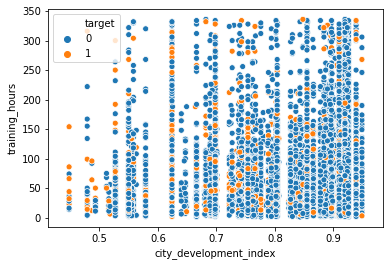

In [28]:
sns.scatterplot(data=train, x="city_development_index", y="training_hours", hue="target")

In [29]:
train.city = train.city.str.replace("city_","",case=False).astype(int)
test.city = test.city.str.replace("city_","",case=False).astype(int)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  int32  
 2   city_development_index  18359 non-null  float64
 3   gender                  18359 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18359 non-null  object 
 6   education_level         18359 non-null  object 
 7   major_discipline        18359 non-null  object 
 8   experience              18359 non-null  object 
 9   company_size            18359 non-null  object 
 10  company_type            18359 non-null  object 
 11  last_new_job            18359 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int32(1), int64(3), obj